In [86]:
import pandas as pd
import numpy as np
import matplotlib as plt
import datetime as dt


from matplotlib import *
import sys
from pylab import *

In [87]:
df = pd.read_excel('radialData.xlsx', sheet_name='data')

In [88]:
df.head()

,Times,Procedure
0,20:45:03,G
1,04:33:06,G
2,06:40:31,G
3,01:14:54,D
4,01:29:38,E


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 2 columns):
Times        10001 non-null object
Procedure    10001 non-null object
dtypes: object(2)
memory usage: 156.4+ KB


In [90]:
df['Times'] = df['Times'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%H:%M:%S'))
df['Procedure'] = df['Procedure'].apply(lambda x: str(x))

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 2 columns):
Times        10001 non-null datetime64[ns]
Procedure    10001 non-null object
dtypes: datetime64[ns](1), object(1)
memory usage: 156.4+ KB


In [92]:
df['Hour'] = df['Times'].dt.hour

(0.0, 6.283185307179586, 0.0, 768.7)

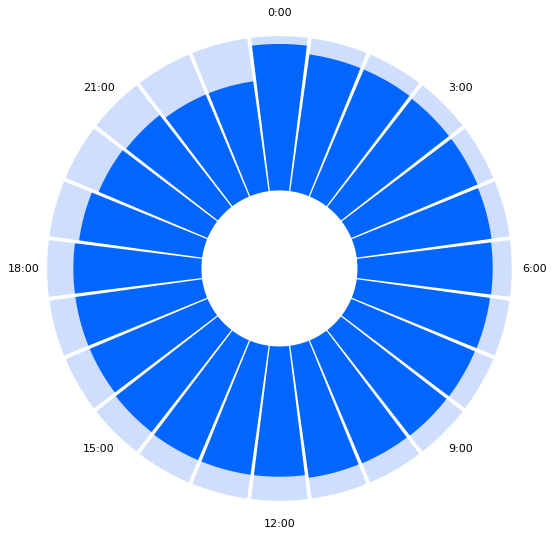

In [166]:
wedges = len(df['Hour'].value_counts()) # number of wedges (should be 24, for 24 hours)
procCounts = df['Hour'].value_counts() # height of bars is the number of observations within that hour

theta=np.arange(0,2*np.pi,2*np.pi/wedges)
width = (2.2*np.pi)/wedges *.85
bottom = 250 # size of the inner circle


fig = plt.figure(figsize=(8,8), dpi=80, facecolor='w')
ax = fig.add_axes([0.1, 0.1, 0.75, 0.75], polar=True)


bars = ax.bar(theta, max(procCounts)+25, width=width, bottom=bottom, color="#CFDEFD") #set background wedge color
bars = ax.bar(theta, procCounts, width=width, bottom=bottom, color='#0066ff') #wedges by hour

N = len(procCounts)

ax.set_theta_zero_location("N")
ax.set_theta_direction(-1)
ax.grid(False)
ax.spines['polar'].set_visible(False)
ax.set_rticks([])

ticks = [f"{i}:00" for i in range(0, 24, 3)]
ax.set_xticklabels(ticks)

#ax.set_xticks(theta)
plt.axis('on')

In [ ]:
padding_height = 24
padding_width = len(df.columns)
df_0 = pd.DataFrame(0, index=range(height), columns=range(width))

#list(data.columns) 